# Sequential Model in Keras


In [1]:
from tensorflow import keras
from keras import layers

In [2]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [3]:
model.weights

ValueError: Weights for model sequential have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

In [4]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.weights

ValueError: Weights for model sequential_1 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

In [6]:
model.build(input_shape=(None, 3))

In [7]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.23953831, -0.25388455, -0.24893025,  0.15530866, -0.170135  ,
         -0.2443651 , -0.20262627,  0.05985314,  0.13533702, -0.2861918 ,
          0.2078144 ,  0.03200617,  0.19123966,  0.2719429 , -0.05372162,
         -0.29682022,  0.2659213 , -0.2556982 ,  0.24873418,  0.00649589,
          0.09353334,  0.03125703, -0.24144891, -0.16454978,  0.22056818,
          0.00096625, -0.21959847, -0.0608072 ,  0.08720025,  0.08692834,
         -0.1614227 , -0.1761359 , -0.27643403, -0.05573997,  0.25408316,
         -0.15616669,  0.03266436,  0.29695493,  0.14526922,  0.07995221,
         -0.14997151,  0.12170151, -0.12521388, -0.25150833,  0.07163811,
          0.08089429,  0.16244924,  0.20873463,  0.01433048, -0.09194414,
          0.19782323,  0.10371754,  0.27166146, -0.09344909,  0.29198772,
         -0.05721714, -0.2556374 , -0.21186984, -0.03821176, -0.19783679,
          0.2703728 , -0.27226228,  0.07754

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [9]:
model = keras.Sequential(name="my_example_model") # You can name a model
model.add(layers.Dense(64, activation='relu', name='my_first_layer')) # You can name to layers
model.add(layers.Dense(10, activation='softmax', name='my_last_layer'))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_first_layer (Dense)       (None, 64)                256       
_________________________________________________________________
my_last_layer (Dense)        (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation='relu'))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


# The Functional API

In [12]:
inputs = keras.Input(shape=(3,), name="my_input")
inputs

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'my_input')>

In [13]:
inputs.shape

TensorShape([None, 3])

In [14]:
inputs.dtype

tf.float32

In [15]:
features = layers.Dense(64, activation='relu')(inputs)
features

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_5')>

In [16]:
features.shape

TensorShape([None, 64])

In [17]:
outputs = layers.Dense(10, activation='softmax')(features)
outputs

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_6')>

In [18]:
model = keras.Model(inputs=inputs, outputs=outputs)
model

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [20]:
vocabulary_size = 10000
num_tags = 100
num_depaertments = 4

title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name="tags")

In [21]:
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

In [22]:
priority = layers.Dense(1, activation='sigmoid', name='priority')(features)

In [23]:
department = layers.Dense(num_depaertments, activation='softmax', name='department')(features)

In [24]:
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 10000)]      0                                            
__________________________________________________________________________________________________
text_body (InputLayer)          [(None, 10000)]      0                                            
__________________________________________________________________________________________________
tags (InputLayer)               [(None, 100)]        0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 20100)        0           title[0][0]                      
                                                                 text_body[0][0]            

In [26]:
vocabulary_size = 10000
num_tags = 100
num_depaertments = 4

title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_depaertments, activation='softmax', name='department')(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [27]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))

text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))

tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))

department_data = np.random.randint(0, 2, size=(num_samples, num_depaertments))

model.compile(optimizer='rmsprop',
              loss=['mean_squared_error', 'categorical_crossentropy'],
              metrics=[['mean_absolute_error'], ['accuracy']])
model.fit([title_data, text_body_data, tags_data], [priority_data, department_data], epochs=1)
model.evaluate([title_data, text_body_data, tags_data], [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

2025-06-04 07:35:59.966773: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2025-06-04 07:35:59.967291: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


40/40 [==============================] - 0s 2ms/step - loss: 34.0429 - priority_loss: 0.3221 - department_loss: 33.7208 - priority_mean_absolute_error: 0.4908 - department_accuracy: 0.2406


In [28]:
priority_preds

array([[1.5649088e-09],
       [7.2121270e-10],
       [9.2494512e-10],
       ...,
       [7.4242656e-10],
       [1.6896542e-09],
       [2.8754543e-09]], dtype=float32)

In [29]:
department_preds

array([[1.01033845e-16, 9.96505737e-01, 3.49424616e-03, 8.93376172e-12],
       [9.52503108e-17, 9.94877517e-01, 5.12247486e-03, 1.30098250e-11],
       [1.46907714e-16, 9.96526062e-01, 3.47390282e-03, 1.38067942e-11],
       ...,
       [1.54934886e-16, 9.98512924e-01, 1.48706837e-03, 1.67434885e-11],
       [3.75453343e-17, 9.99086261e-01, 9.13777505e-04, 4.83453902e-12],
       [3.58023119e-16, 9.98398244e-01, 1.60174503e-03, 6.26006798e-12]],
      dtype=float32)

In [30]:
priority_data

array([[0.49186874],
       [0.26243433],
       [0.78481713],
       ...,
       [0.06719329],
       [0.31714829],
       [0.28875229]])

In [31]:
model.compile(optimizer="rmsprop", loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"}, metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data}, {"priority": priority_data, "department": department_data}, epochs=1)

40/40 [==============================] - 0s 4ms/step - loss: 40.7185 - priority_loss: 0.3308 - department_loss: 40.3876 - priority_mean_absolute_error: 0.4988 - department_accuracy: 0.2680


In [32]:
model.compile(optimizer="rmsprop", loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"}, metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data}, {"priority": priority_data, "department": department_data}, epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data}, {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict({"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 2ms/step - loss: 43.8552 - priority_loss: 0.3221 - department_loss: 43.5331 - priority_mean_absolute_error: 0.4908 - department_accuracy: 0.1266


In [ ]:
# keras.utils.plot_model(model, "ticket_classifier.png")

In [ ]:
# keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [33]:
model.layers

In [34]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [35]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_2')>

In [36]:
features = model.layers[4].output

difficulty = layers.Dense(3, activation='softmax', name="difficulty")(features)

new_model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department, difficulty])

In [ ]:
# keras.utils.plot_model(new_model, "updated_ticket_classfier.png", show_shapes=True)

# Subclassing


In [37]:
class CustomerTicketModel(keras.Model):
    def __init__(self, num_depaertments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_layer = layers.Dense(1, activation="sigmoid", name="priority")
        self.department_layer = layers.Dense(num_depaertments, activation="softmax", name="department")
    
    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]
        
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_layer(features)
        department = self.department_layer(features)
        
        return priority, department

model = CustomerTicketModel(num_depaertments=4)
priority, department = model({"title": title_data, "text_body": text_body_data, "tags": tags_data})
model.compile(optimizer="rmsprop", 
              loss=["mean_squared_error", "categorical_crossentropy"], 
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data], 
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data}, [priority_data, department_data])
priority, department_data = model.predict({"title": title_data, "text_body": text_body_data, "tags": tags_data})


40/40 [==============================] - 0s 2ms/step - loss: 18.8641 - output_1_loss: 0.3221 - output_2_loss: 18.5421 - output_1_mean_absolute_error: 0.4908 - output_2_accuracy: 0.5695


In [38]:
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)
        
    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)



In [39]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classfier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classfier
    
    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

In [40]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

In [41]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [42]:
model = get_mnist_model()
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2967 - accuracy: 0.9112 - val_loss: 0.1559 - val_accuracy: 0.9564
Epoch 2/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1652 - accuracy: 0.9538 - val_loss: 0.1267 - val_accuracy: 0.9666
Epoch 3/3
313/313 [==============================] - 0s 623us/step - loss: 0.1109 - accuracy: 0.9715


In [43]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(name="total_samples", initializer="zeros", dtype="int32")
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)        

In [44]:
model = get_mnist_model()
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", RootMeanSquaredError()])

In [45]:
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2973 - accuracy: 0.9120 - rmse: 7.1832 - val_loss: 0.1484 - val_accuracy: 0.9588 - val_rmse: 7.3530
Epoch 2/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1638 - accuracy: 0.9544 - rmse: 7.3534 - val_loss: 0.1192 - val_accuracy: 0.9686 - val_rmse: 7.4035
Epoch 3/3
313/313 [==============================] - 0s 927us/step - loss: 0.1030 - accuracy: 0.9724 - rmse: 7.4344


In [46]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=10, callbacks=callbacks_list, validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2990 - accuracy: 0.9111 - val_loss: 0.1490 - val_accuracy: 0.9567
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1673 - accuracy: 0.9528 - val_loss: 0.1194 - val_accuracy: 0.9677
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1397 - accuracy: 0.9626 - val_loss: 0.1216 - val_accuracy: 0.9686
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1287 - accuracy: 0.9667 - val_loss: 0.1058 - val_accuracy: 0.9729
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1195 - accuracy: 0.9696 - val_loss: 0.1042 - val_accuracy: 0.9752
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1092 - accuracy: 0.9731 - val_loss: 0.1046 - val_accuracy: 0.9769
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1018 - accuracy: 0.9747 - val_loss: 0.1113 - val_accuracy:

In [47]:
model = keras.models.load_model("checkpoint_path.keras")

In [48]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
    
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))
    
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label="Training Loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []
        
model = get_mnist_model()
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"])

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.9107 - val_loss: 0.1507 - val_accuracy: 0.9574
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1649 - accuracy: 0.9546 - val_loss: 0.1361 - val_accuracy: 0.9641
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1381 - accuracy: 0.9626 - val_loss: 0.1078 - val_accuracy: 0.9726
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1264 - accuracy: 0.9668 - val_loss: 0.1137 - val_accuracy: 0.9739
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1184 - accuracy: 0.9701 - val_loss: 0.1113 - val_accuracy: 0.9759
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1088 - accuracy: 0.9730 - val_loss: 0.1106 - val_accuracy: 0.9771
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1056 - accuracy: 0.9750 - val_loss: 0.1239 - val_accuracy:

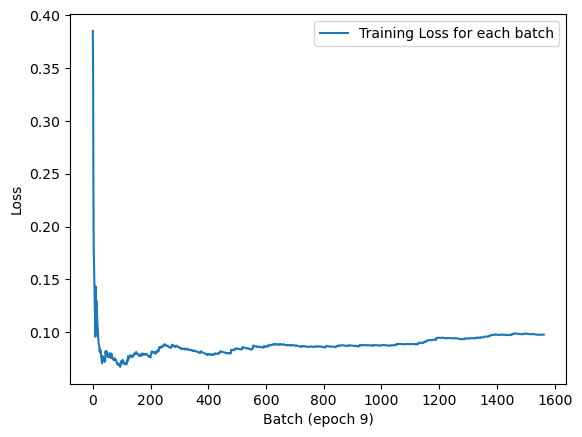

In [49]:
model.fit(train_images, train_labels, epochs=10, callbacks=[LossHistory()], validation_data=(val_images, val_labels))

# TensorBoard

In [50]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(log_dir="")
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), callbacks=[tensorboard])

Epoch 1/10
   1/1563 [..............................] - ETA: 3:17 - loss: 2.5042 - accuracy: 0.1250

2025-06-04 07:39:15.068447: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2025-06-04 07:39:15.068466: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2025-06-04 07:39:15.068891: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2025-06-04 07:39:15.226820: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2025-06-04 07:39:15.226831: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2025-06-04 07:39:15.229136: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2025-06-04 07:39:15.235240: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2025-06-04 07:39:15.241235: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: train/plugins/profile/2025_06_04_07_39_15

2025-06-04 07:39:15.241830: I tensorflow/core/profiler/rpc/

1563/1563 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.9116 - val_loss: 0.1602 - val_accuracy: 0.9579
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1698 - accuracy: 0.9523 - val_loss: 0.1305 - val_accuracy: 0.9658
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1434 - accuracy: 0.9626 - val_loss: 0.1199 - val_accuracy: 0.9694
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1242 - accuracy: 0.9674 - val_loss: 0.1160 - val_accuracy: 0.9705
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1185 - accuracy: 0.9700 - val_loss: 0.0987 - val_accuracy: 0.9762
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1118 - accuracy: 0.9738 - val_loss: 0.1076 - val_accuracy: 0.9755
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9748 - val_loss: 0.1135 - val_accuracy: 0.9767
Epo

In [51]:
%load_ext tensorboard
%tensorboard --logdir .

In [52]:
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [53]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"Result after updating state: {current_result}")

Result after updating state: 1.0


In [54]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result()}")

Mean of values: 2.0


In [55]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()

optimizer = keras.optimizers.RMSprop()

metrics = [keras.metrics.SparseCategoricalAccuracy()]

loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    
    logs = {}
    
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()
    
    loss_tracking_metric.update_state(loss)
    
    logs["loss"] = loss_tracking_metric.result()
    
    return logs

def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [56]:
training_dataset = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3 
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9134
...loss: 0.2927
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9535
...loss: 0.1662
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9627
...loss: 0.1392


In [57]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)
    
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Validation results")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Validation results
...val_sparse_categorical_accuracy: 0.9646
...val_loss: 0.1374


In [58]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

In [59]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}
    
    @property
    def metrics(self):
        return [loss_tracker]

In [60]:
inputs = keras.Input(shape=(28 * 28,))

features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3, batch_size=32)

Epoch 1/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2974
Epoch 2/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1679
Epoch 3/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1406


In [61]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2976
Epoch 2/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1648
Epoch 3/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1423
